In [13]:
set_nb_theme('onedork')

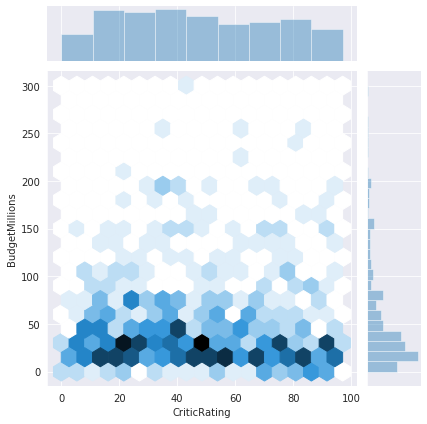

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import os 
# %matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

#jointplot
movies = pd.read_csv(os.getcwd() + '/P4-Movie-Ratings.csv')
movies.columns = ['Film','Genre','CriticRating','AudienceRating','BudgetMillions','Year']

movies.head()
j = sns.jointplot(data=movies, x='CriticRating', y='BudgetMillions', kind='hex')

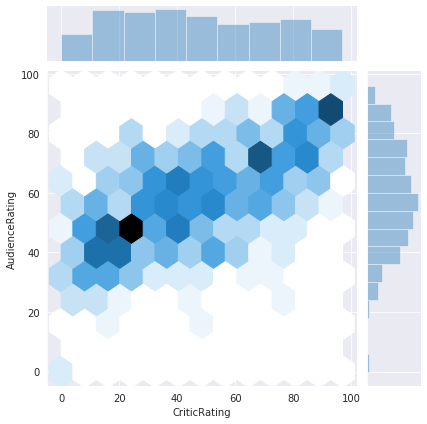

In [4]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

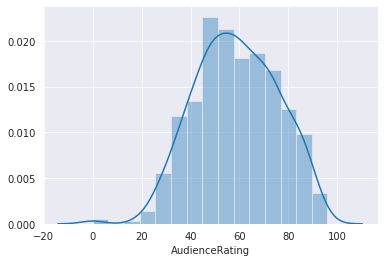

In [5]:
m1 = sns.distplot(movies.AudienceRating, bins=15)

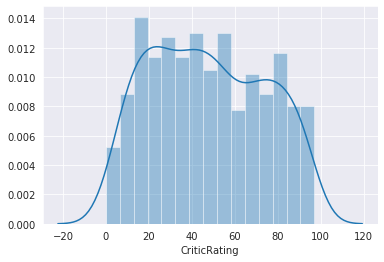

In [6]:
n1 = sns.distplot(movies.CriticRating, bins=15 )

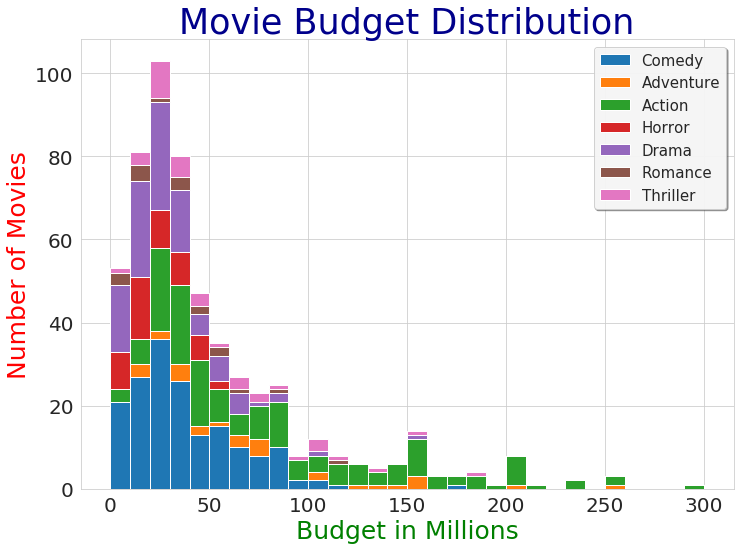

In [58]:

list1 = []
mylabels = []
for genre in movies.Genre.unique():
    list1.append(movies[movies.Genre == genre ].BudgetMillions)
    mylabels.append(genre)
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) #size of A4 paper
plt.hist(list1, bins=30, stacked=True, label=mylabels)
plt.title("Movie Budget Distribution",fontsize=35, color='DarkBlue', fontname='Console')
plt.ylabel('Number of Movies', fontsize=25, color='Red')
plt.xlabel('Budget in Millions', fontsize=25, color='Green')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size':15}, shadow=True, framealpha=0.9)
plt.show()

### Facet Grid

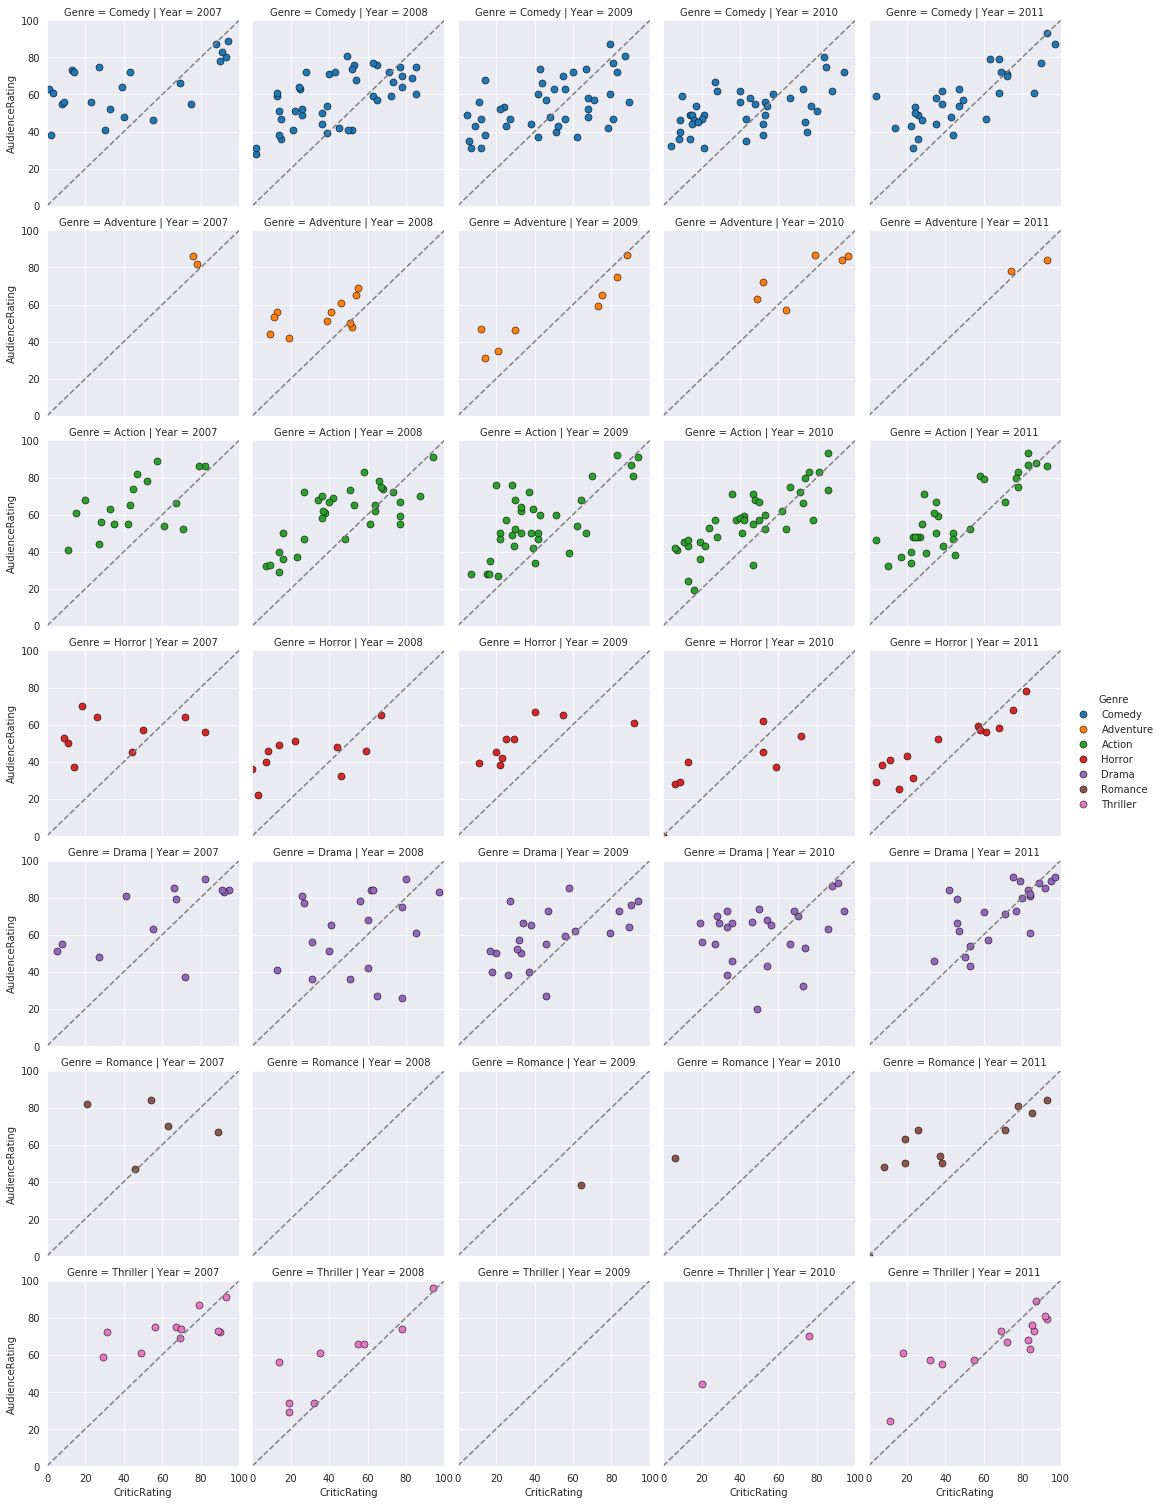

In [16]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating',**kws)
g.set(xlim=(0,100),ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100),c='gray', ls='--')
g.add_legend()
plt.show()

### Dashboard and Styling

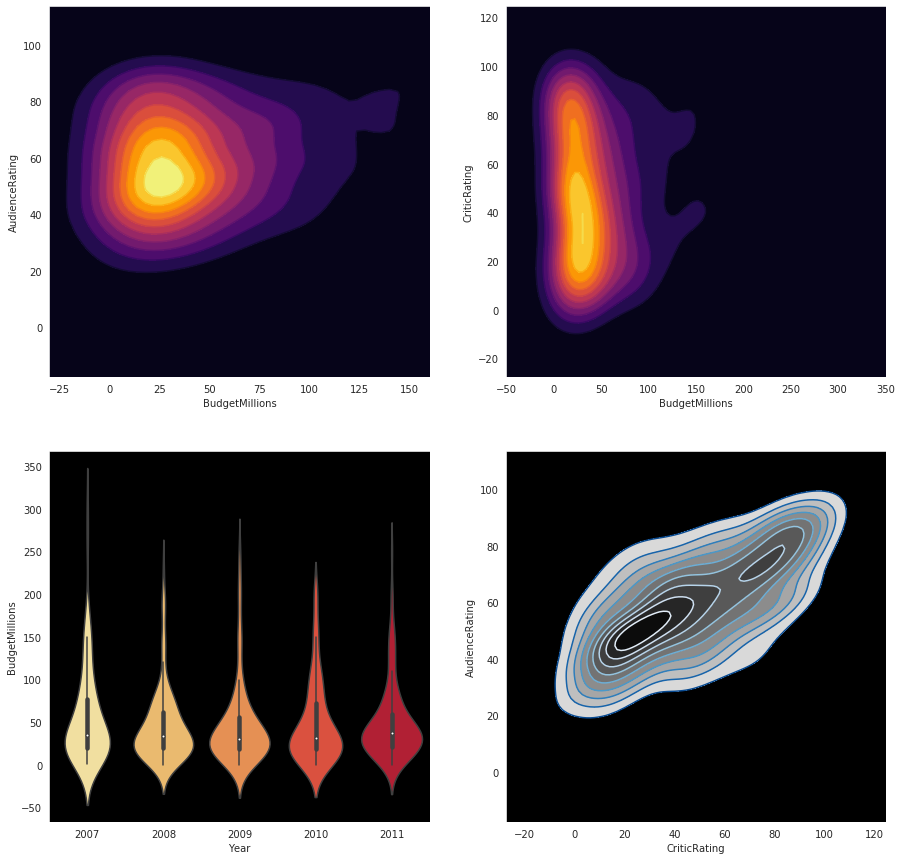

In [46]:
sns.set_style("dark",{"axes.facecolor":"black"})

# Dashboard
f, axes = plt.subplots(2,2, figsize=(15,15))
#plot 0,0
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0], shade=True
                , shade_lowest=True, cmap='inferno')
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0], cmap='inferno')

#plot 0,1
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1], shade=True
                 , shade_lowest=True, cmap='inferno')
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1], cmap='inferno')

#plot 1,0
k3 = sns.violinplot(data=movies, x='Year', y='BudgetMillions', ax=axes[1,0], palette='YlOrRd')

#plot 1,1
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Blues_r')
k5 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, 
                 shade_lowest=False, cmap='gist_gray_r')
k1.set(xlim=(-30, 160))
plt.show()
